# Basic classification in TensorFlow/Keras

Based on:
https://www.tensorflow.org/tutorials/keras/basic_classification
and
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

## 0. Install TensorFlow and Keras

TensorFlow is an open source machine learning framework created by Google.
Keras is a high-level API to build and train models in TensorFlow used in this tutorial.

### 0.1. Install TensorFlow and Keras with Anaconda3:

pip install tensorflow
pip install keras

### 0.2. TensorFlow and Python3 compatibility issues

(As of November, 2018) Anaconda3 is supplied with Python 3.7, unfortunately Tensorflow is not ready yet for that, and TensorFlow installation would fail.
You should downgrade to Python 3.5 and then reinstall TensorFlow+Keras:

conda install python=3.5.0

pip install tensorflow
pip install keras

## 1. Prepare the workspace and obtain+preprocess MNIST data

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Convolution2D, MaxPooling2D
from keras.utils import to_categorical # note will mean we need to change names
# from np_utils to to_categorical in some places

In [3]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.8.0


MNIST dataset: 70,000 images of decimal digits (0..9) in format 28x28:

https://en.wikipedia.org/wiki/MNIST_database

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/MNIST_dataset_example.png/640px-MNIST_dataset_example.png)

In [5]:
# Import MNIST dataset split into 60,000 for training and 10,000 for testing
dset = keras.datasets.mnist
# here I unpack the data into 4 main parts
# we get two tuples which have two parts inside
# so we unpack the outer shell and unpack the inner parts as well
(train_images, train_labels), (test_images, test_labels) = dset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
type(dset)

module

In [7]:
alldata = dset.load_data()

In [8]:
type(alldata)

tuple

In [9]:
len(alldata), type(alldata[0])

(2, tuple)

In [11]:
# our components are ndarray types of possibly multiple dimensions
train_images.shape

(60000, 28, 28)

In [12]:
# let's see the first one
train_images[0].shape

(28, 28)

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [14]:
train_labels[0]

np.uint8(5)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].dtype

dtype('uint8')

In [18]:
2**8

256

In [19]:
256**3 # we get 16 million colors

16777216

In [ ]:
2**32

4294967296

In [ ]:
# How many colors can RGB with 3 bytes hold
256*256*256

16777216

In [ ]:
# we see ads with 10 bit color as well
# so each color gets 2^10 == 1024 values instead of usual 8 bit
(2**10)**3

1073741824

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images[0].shape

(28, 28)

In [20]:
28**2

784

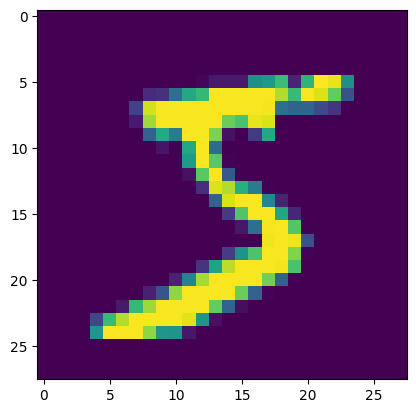

In [21]:
# Insight into imported data
num = 0
plt.imshow(train_images[num])

In [ ]:
train_labels[0]

5

5
0
4
1
9


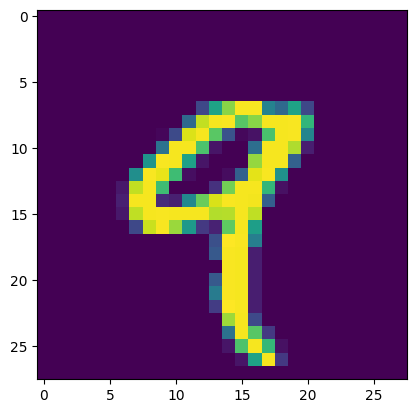

In [22]:
for n in range(5):
  plt.imshow(train_images[n])
  print(train_labels[n])

In [ ]:
28*28

784

In [ ]:
num

0

In [ ]:
print(train_images[num])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
train_images[2][np.argmax(train_images[2], axis=1)]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [24]:
# what is the maximum value in our input features?
# it should be max of 2^8 - 1 because we start values from 0
np.amax(train_images), 2**8-1

(np.uint8(255), 255)

In [25]:
np.amin(train_images)

np.uint8(0)

In [ ]:
train_images.dtype

dtype('uint8')

In [26]:
a = np.array([126,127,128,129], dtype='uint8')
a

array([126, 127, 128, 129], dtype=uint8)

In [ ]:
b = a.astype('int8')
b

array([ 126,  127, -128, -127], dtype=int8)

In [ ]:
c = np.array([254,255,256,257], dtype='uint64')
c

array([254, 255, 256, 257], dtype=uint64)

In [ ]:
d = c.astype('uint8')
d

array([254, 255,   0,   1], dtype=uint8)

In [ ]:
e = c.astype('int8')
e

array([-2, -1,  0,  1], dtype=int8)

In [ ]:
f = np.array([1,3,35,25,25,25])
f

array([ 1,  3, 35, 25, 25, 25])

In [ ]:
f.dtype

dtype('int64')

In [27]:
print(train_images[num].shape)

(28, 28)


In [ ]:
print(train_labels[num])

5


In [ ]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [ ]:
np.amax(train_labels)

9

In [ ]:
np.amin(train_labels)

0

In [ ]:
# faster than built in set
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [28]:
# Categorize labels (not mandatory for our first simple network)
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

In [29]:
train_labels[0]

np.uint8(5)

In [30]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
print(train_labels[num], train_labels_cat[num])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(test_labels[0], test_labels_cat[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
np.max(test_images)

255

In [ ]:
np.min(test_images)

0

In [31]:
# Preprocess image data # we need to have data fit in floating range between 0 and 1
test_images_orig = test_images # this is not a copy FIXME!
train_images = train_images / 255 # so like a loop that goes through all the values in train_images and each one is divided 255
test_images = test_images / 255

In [32]:
np.max(train_images) # make sure we did it right and max is not over 1

np.float64(1.0)

In [33]:
np.mean(train_images)

np.float64(0.1306604762738429)

0


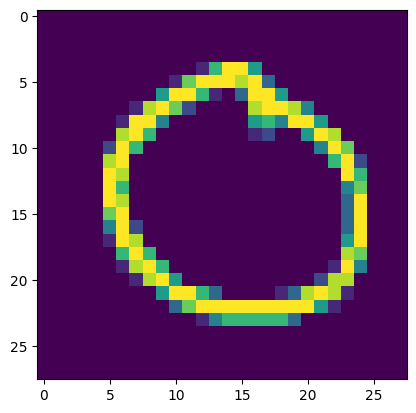

In [34]:
num = 68
print(train_labels[num])
plt.imshow(train_images[num])

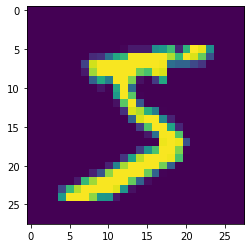

In [ ]:
plt.imshow(train_images[0])

In [ ]:
print(train_images[num])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 2. Create, train and run model

### 2.1. Create simple model

In [35]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28))) # here we flatten the 28x28 matrix into a single vector
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax)) #how many different answers we need in the output layer
# we need 10 because we know we have 10 different digits

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 2.2. Compile model

In [36]:
# we prepare our model (ANN) for work
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### 2.3. Train model

In [37]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [39]:
# the training happens here
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8789 - loss: 0.4378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9649 - loss: 0.1198
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9769 - loss: 0.0778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9839 - loss: 0.0562
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9902 - loss: 0.0338
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0266
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9937 - loss: 0.0214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9956 - loss: 0.0165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9958 - loss: 0.0146


## 3. Test model

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0956
0.08142591267824173 0.9778000116348267


In [41]:
type(model)

keras.src.models.sequential.Sequential

In [42]:
# Print accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9778000116348267


In [43]:
10000 - 9779

221

In [44]:
# Calculate prediction for test data
# here we can make our own predictions
# so this could be done in production as well, just feed the model images/features in the same format as training data
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


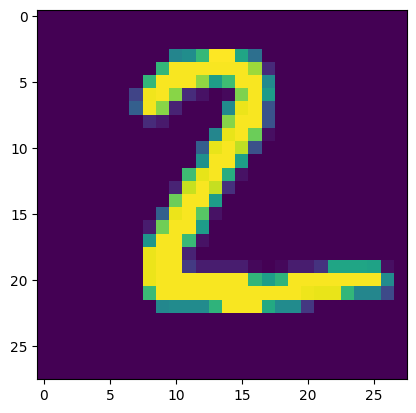

In [45]:
# Check what is predicted
num = 1
plt.imshow(test_images[num])

In [46]:
print(predictions[num])

[2.8528280e-12 1.1599878e-10 9.9999994e-01 2.9187000e-11 2.3393646e-24
 2.2826836e-11 1.4927235e-11 7.4657377e-19 3.9969861e-10 5.3064786e-18]


In [48]:
predictions[num].sum() # everything except most likely case here is basically 0

np.float32(0.99999994)

In [47]:
np.amax(predictions[num])

np.float32(0.99999994)

In [49]:
np.where(predictions[num] == np.amax(predictions[num]))

(array([2]),)

In [50]:
len(predictions)

10000

In [51]:
# gets index of the largest value
print(np.argmax(predictions[num]))

2


## 4. Visualize results

### 4.1. Define auxiliary functions

In [52]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 4.2. Plot prediction

In [53]:
# class names just for visualization
class_names = ['0-zero', '1-one', '2-two', '3-three', '4-four',
               '5-five', '6-six', '7-seven', '8-eight', '9-nine']

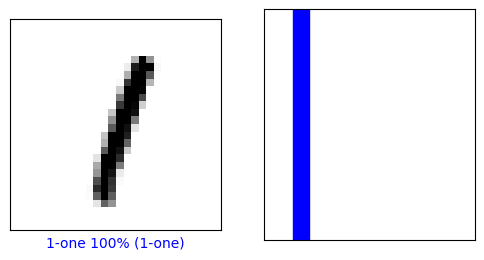

In [54]:
# visualization of prediction of one image
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

### 4.3. More visualization

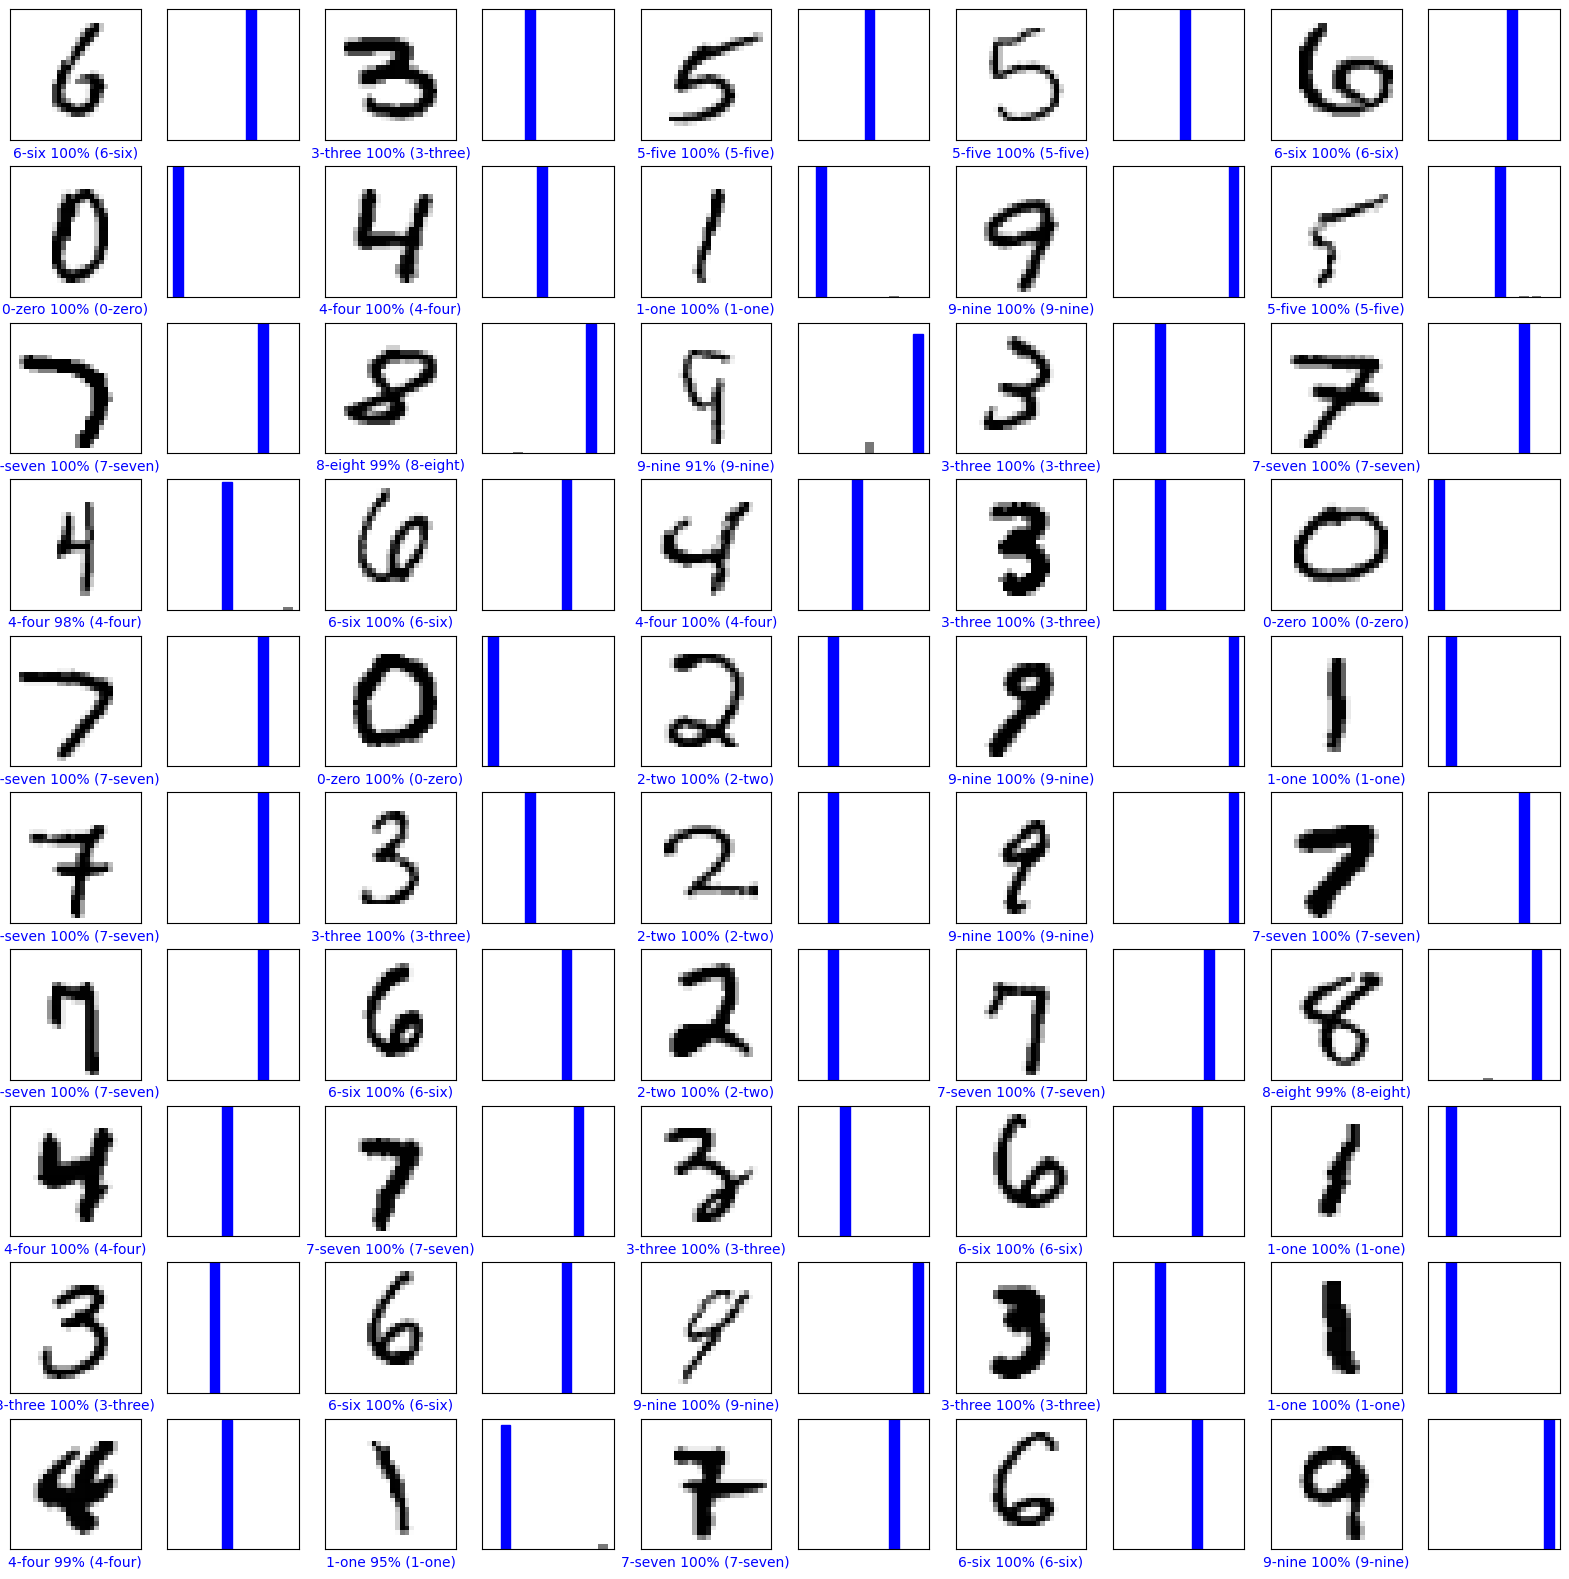

In [55]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+50, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+50, predictions, test_labels)

In [56]:
def plot50(offset=0):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i+offset, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i+offset, predictions, test_labels)

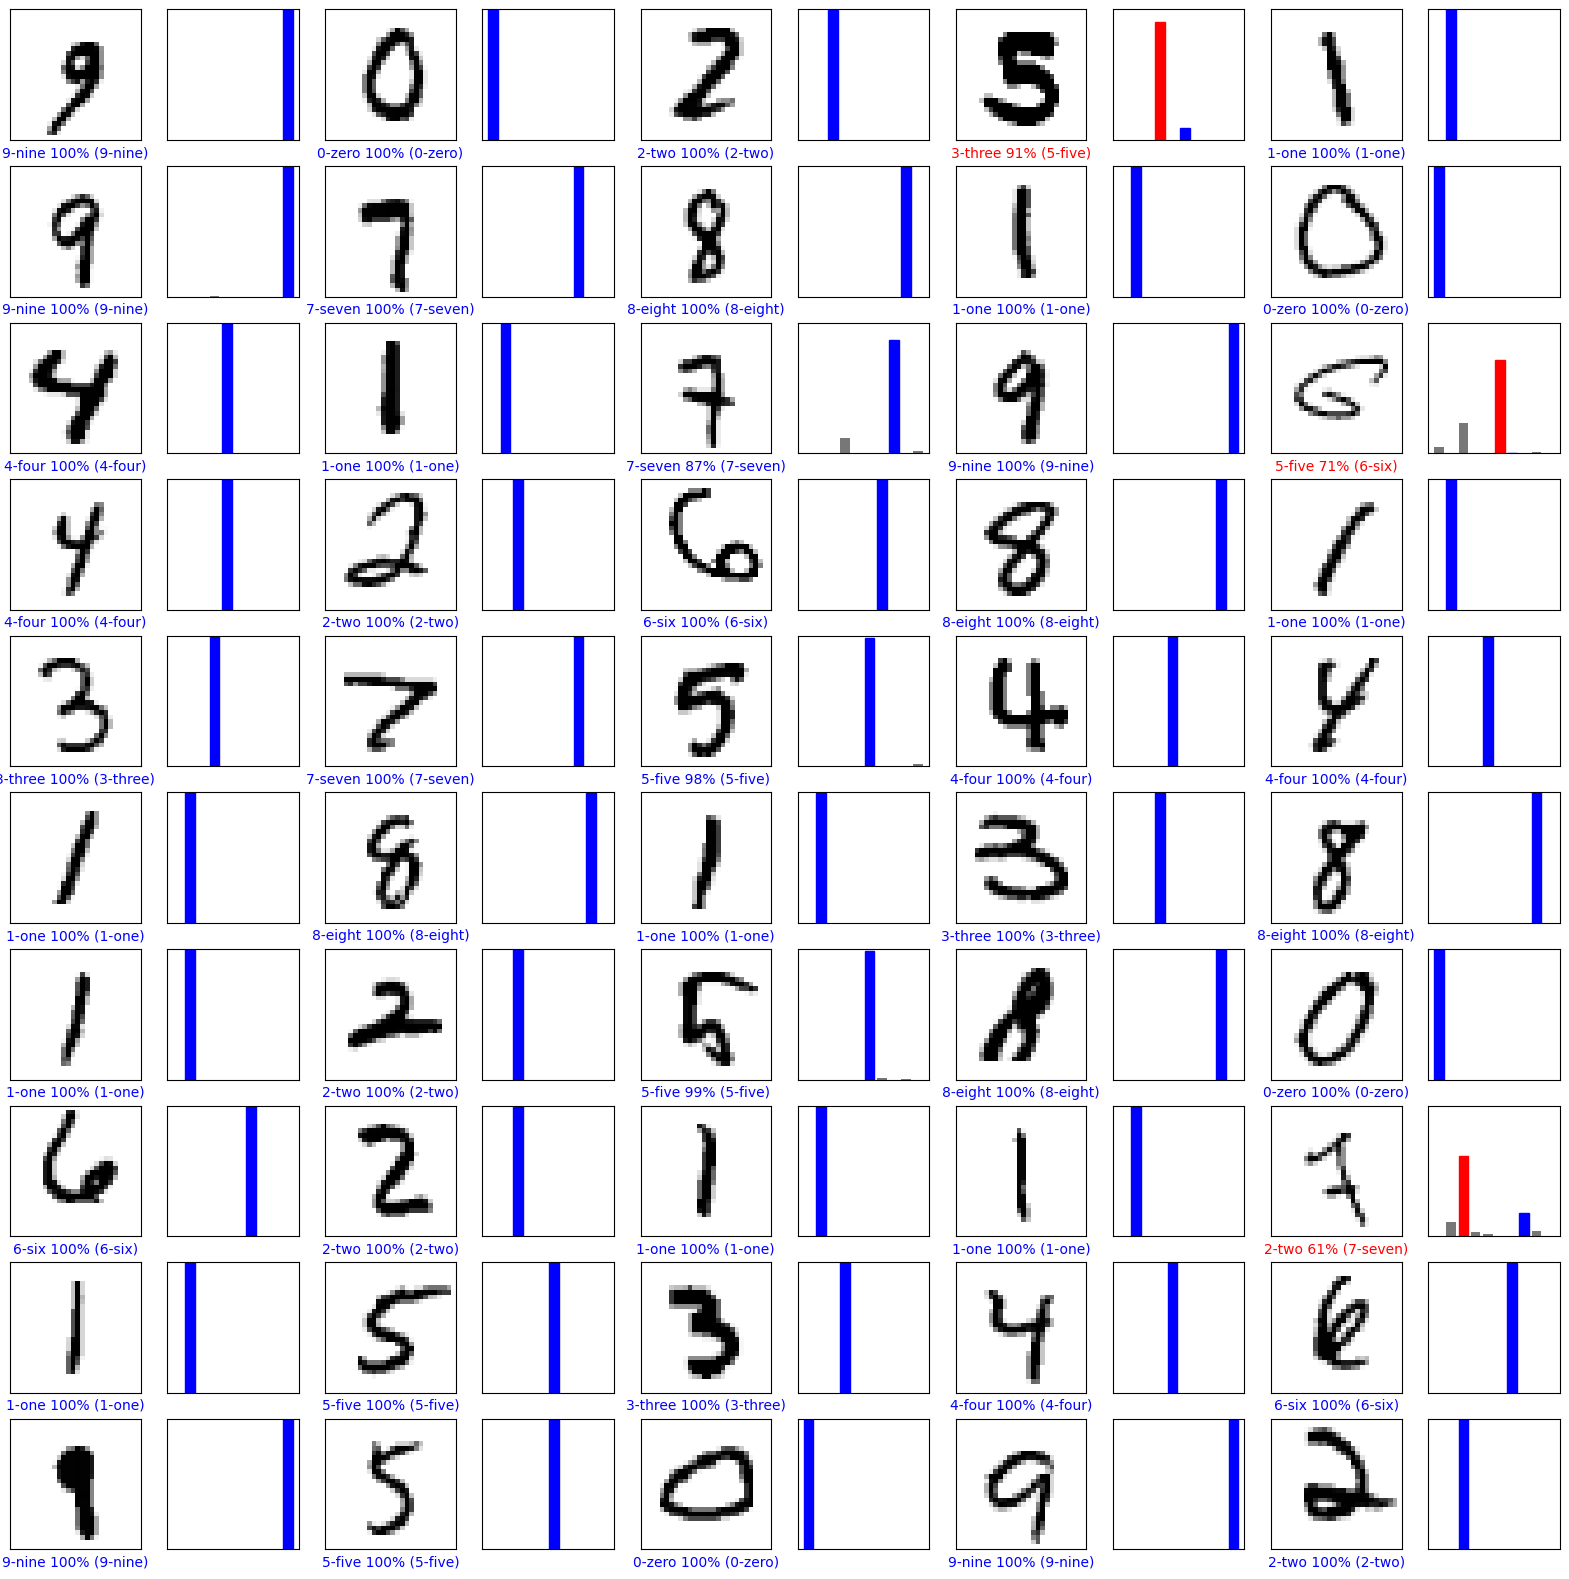

In [57]:
plot50(1000)

In [ ]:
len(predictions), len(test_labels)

(10000, 10000)

In [ ]:
predictions[0]

array([5.4874634e-09, 1.7241818e-10, 2.2928990e-07, 1.5958584e-03,
       3.7736744e-14, 9.5518962e-09, 5.0314239e-16, 9.9839514e-01,
       4.1882083e-07, 8.2588776e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
errors = []
for i, el in enumerate(predictions):
  if np.argmax(el) != test_labels[i]:
    errors.append(i)
len(errors)

221

In [ ]:
10000-210

In [ ]:
errors[:5]

[104, 247, 321, 340, 381]

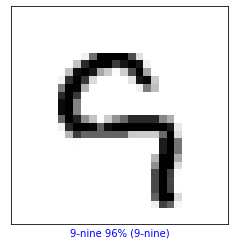

In [ ]:
plot_image(104, predictions, test_labels, test_images_orig)


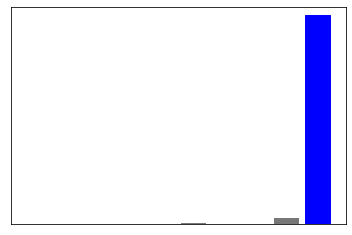

In [ ]:
plot_value_array(104, predictions, test_labels)

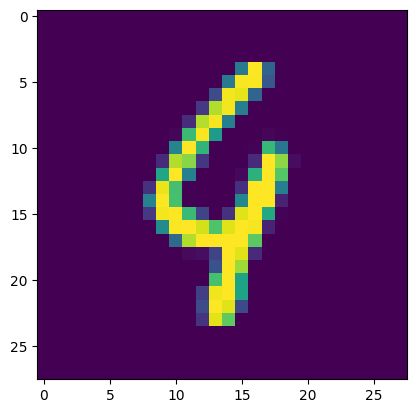

In [58]:
plt.imshow(test_images_orig[115])

## 5. Import, preprocess and train FASHION-MNIST

Fashion-MNIST is similar to MNIST but of clothings:
https://en.wikipedia.org/wiki/Fashion_MNIST

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


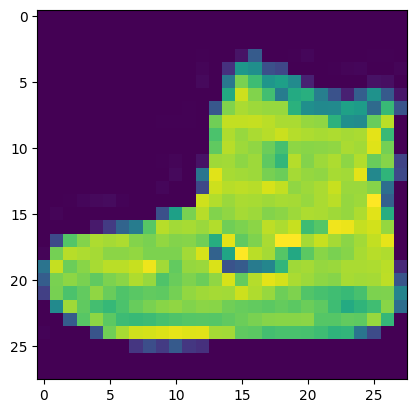

In [59]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
num = 0
plt.imshow(train_images[num])

In [60]:
train_labels[0]

np.uint8(9)

In [61]:
np.max(train_labels)

np.uint8(9)

In [62]:
len(train_images)

60000

In [63]:
np.amax(train_images)

np.uint8(255)

In [64]:
# Preprocess data
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [65]:
# Create and compile model
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
# Train model and obtain predictions
# we add a few more epochs since this is a harder to learn image set
model.fit(train_images, train_labels_cat, epochs=15)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
# finally let's make predictions to all test_images
predictions = model.predict(test_images)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7844 - loss: 0.6210
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8643 - loss: 0.3794
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8751 - loss: 0.3394
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8849 - loss: 0.3162
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8914 - loss: 0.2918
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8977 - loss: 0.2733
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9021 - loss: 0.2631
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9047 - loss: 0.2538
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9090 - loss: 0.2431
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9126 - loss: 0.2338
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9146 - loss: 0.2280
Epoch 12/15
1875/1875 ━━━

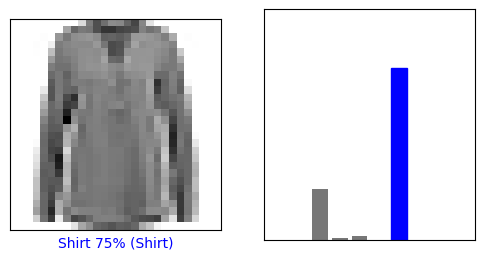

In [67]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 9004
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

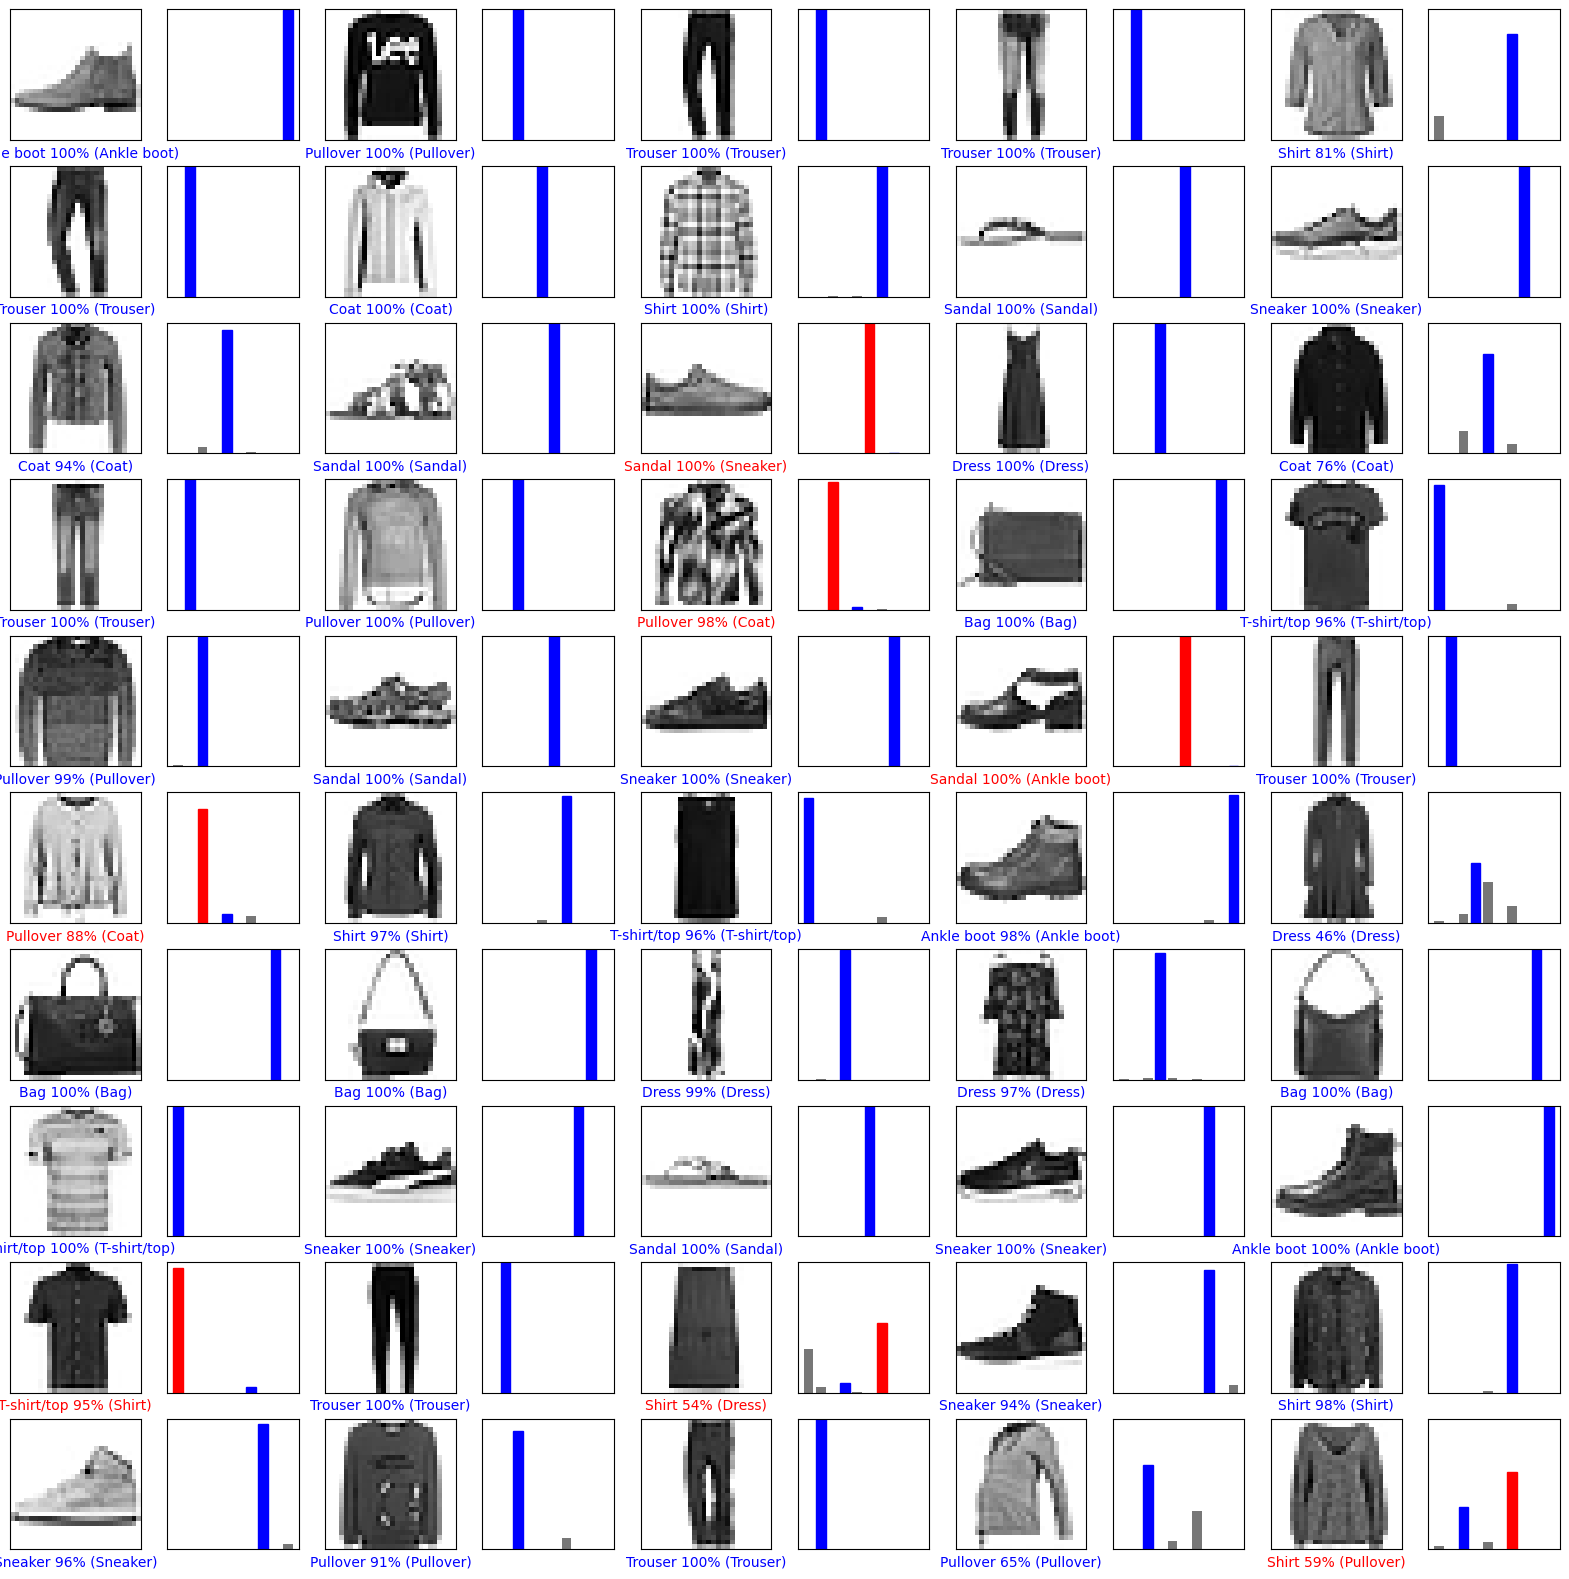

In [68]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [69]:
def findErrors(predictions, answers):
  errors = []
  for i, el in enumerate(predictions):
    if np.argmax(el) != answers[i]:
      errors.append(i)
  return errors

In [70]:
badClothes = findErrors(predictions, test_labels)
len(badClothes)

1132

In [73]:
len(test_labels), test_acc, 1 - len(badClothes)/len(test_labels)

(10000, 0.8867999911308289, 0.8868)

In [74]:
badClothes[:5] # these are indexes in our predictions where the TOP prediction is wrong

[12, 17, 23, 25, 40]

In [75]:
# let's collect the bad clothes in bad_items and bad_items_true_labels
bad_items = []
bad_items_true_labels = []
bad_predictions = []
for i in badClothes:
  bad_items.append(test_images_orig[i])
  bad_items_true_labels.append(test_labels[i])
  bad_predictions.append(predictions[i])

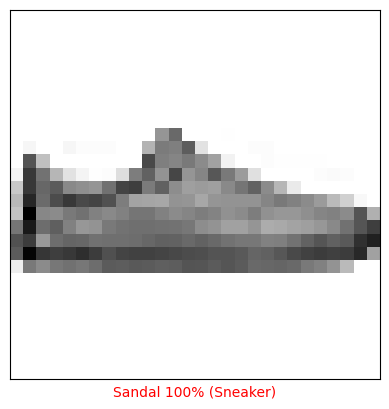

In [76]:
# let's plot first bad_image
plot_image(0, bad_predictions, bad_items_true_labels, bad_items)


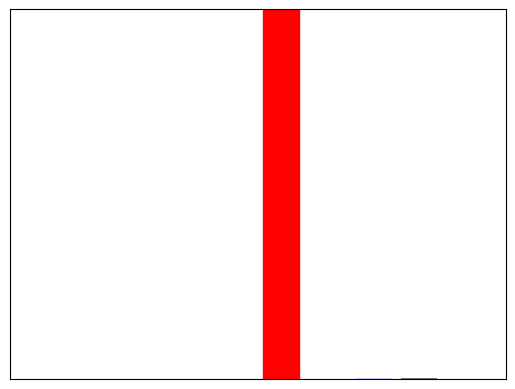

In [77]:
plot_value_array(0, bad_predictions, bad_items_true_labels)

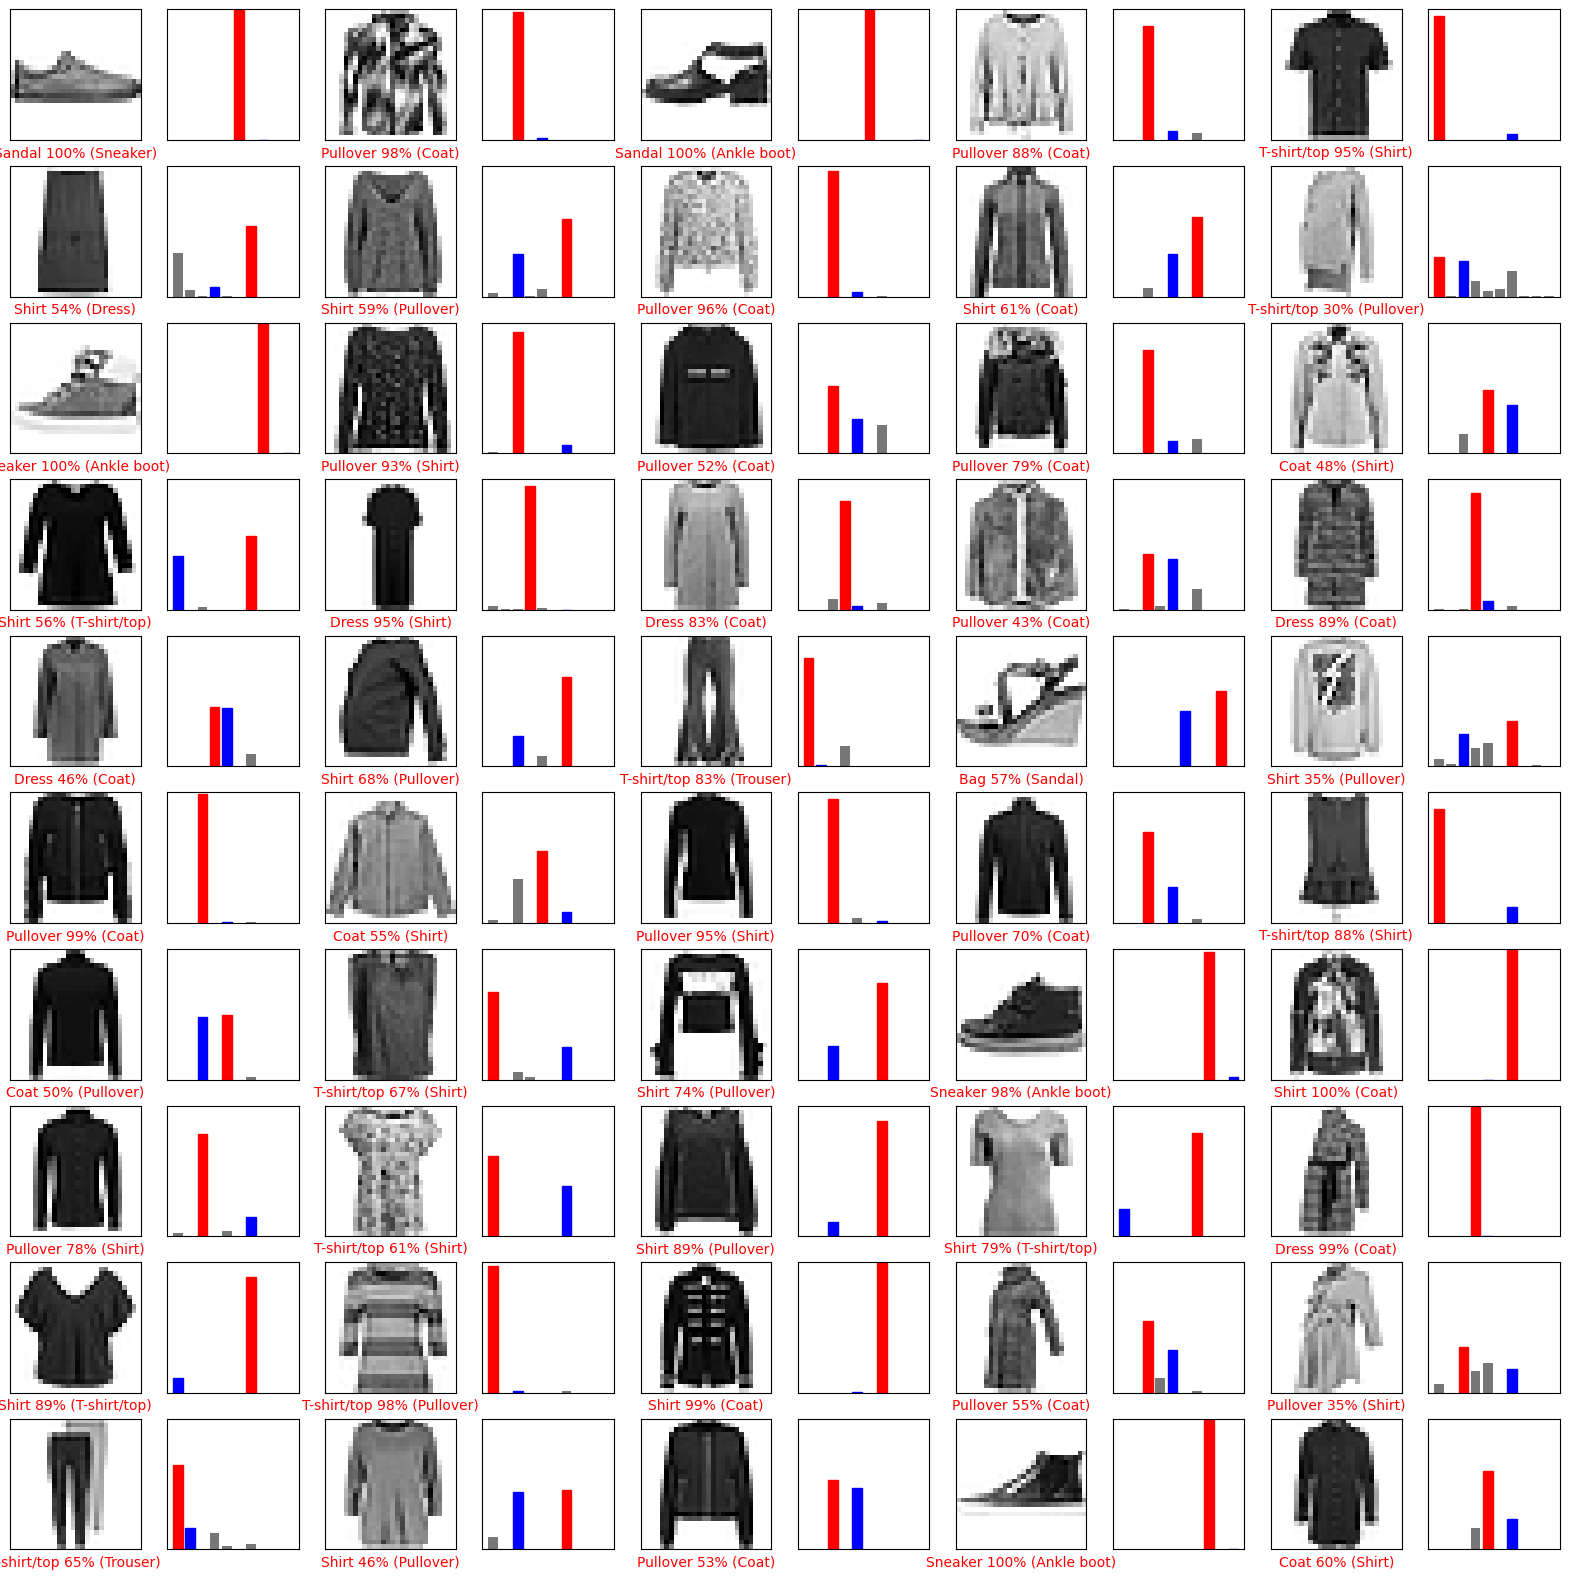

In [78]:
# let's plot first 5 of the bad items along with the distribution of their guesses
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, bad_predictions, bad_items_true_labels, bad_items)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, bad_predictions, bad_items_true_labels)



## 6. Convolutional neural network

Convolutional neural networks are better suited for image recognition

In [ ]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
test_images_orig = test_images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
np.max(train_images)

1.0

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# Create and train model, and obtain predictions
model = keras.Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.fit(train_images, train_labels_cat,
              batch_size=32, epochs=3, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Epoch 1/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.4881 - accuracy: 0.8250
Epoch 2/3
1875/1875 [==============================] - 104s 55ms/step - loss: 0.3322 - accuracy: 0.8803
Epoch 3/3
313/313 [==============================] - 4s 14ms/step - loss: 0.2490 - accuracy: 0.9074
Test accuracy: 0.9074000120162964


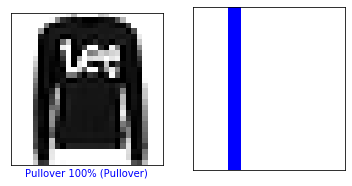

In [ ]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [ ]:
badclothes = findErrors(predictions, test_labels)
len(badclothes)

918

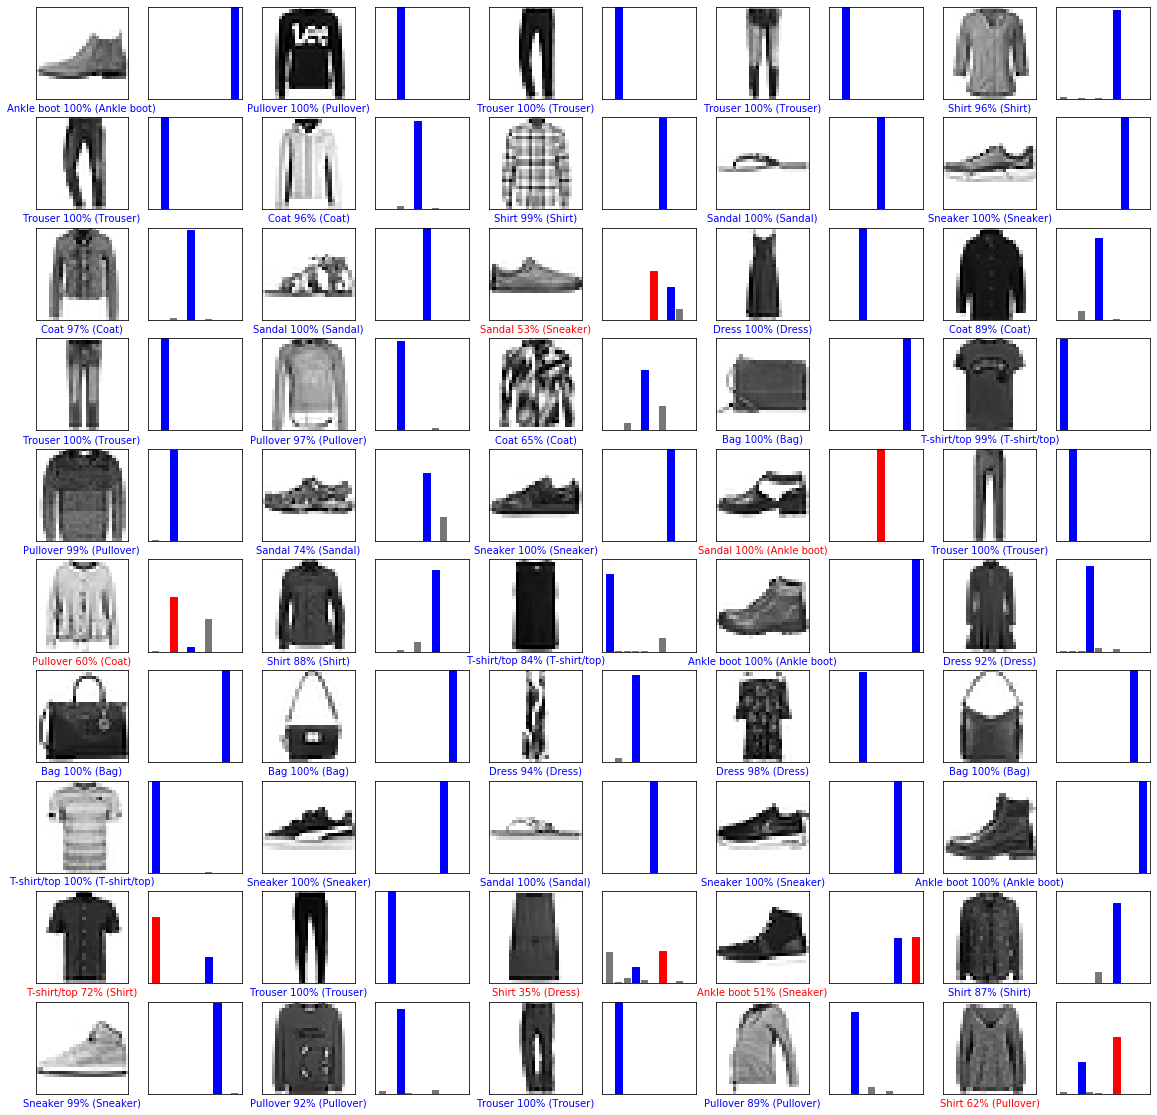

In [ ]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [ ]:
def plotFromIndex(index):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i, ndx in enumerate(index):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(ndx, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(ndx, predictions, test_labels)

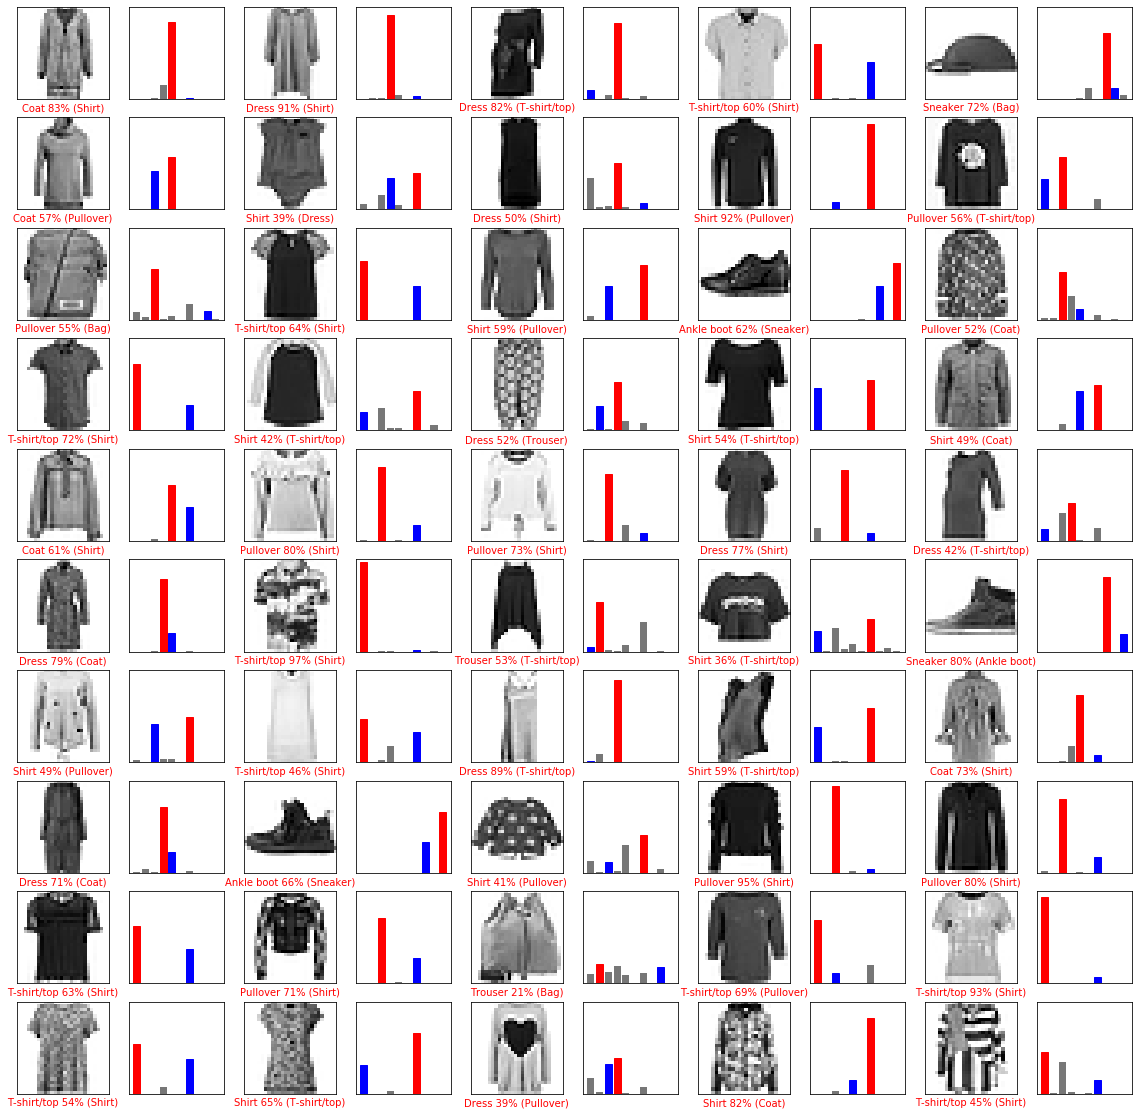

In [ ]:
plotFromIndex(badclothes[-50:])